# HW3 - Data Analysis & Make Prediction Models

#### Data Science in Korea University, Prof. Jaewoo Kang
#### COSE471, Spring 2018
#### Due : 6/12 (Tues)  11:59 AM [Before Class Start]

## Notice Class schedule
<table>
  <tr>
    <th>Date</th>
    <th>Desc.</th>
  <tr>
    <td>5/29</td>
    <td>MID-TERM EXAM & HW#3 Start Date</td>
  </tr>
  <tr>
    <td>5/31</td>
    <td>HW#2 Late Hand-In Due Date</td>
  </tr>
  <tr>
    <td>6/12</td>
    <td>HW#3 Due Date & HW#4(Project) Start Date</td>
  </tr>
  <tr>
    <td>6/19</td>
    <td>HW#3 Late Hand-In Due Date</td>
  </tr>
  <tr>
    <td>6/21</td>
    <td>FINAL EXAM(NOT FIXED)</td>
  </tr>
  <tr>
    <td>6/26</td>
    <td>HW#4(Project) Due Date(NO LATE HAND-IN)</td>
  </tr>
</table>

## Assignment Credit

### Your assignments are 30% of the total score. The scores for each assignment are as follows.
- __HW#1: 5%__
- __HW#2: 7%__
- __HW#3: 8%__
- __HW#4(Project): 10%__

## Python Assingment HW3 Guide
- You need to fill out your code in ###YOUR CODE HERE### or #TODO.
- The code results should be the same as the results displayed below the code or the format we gave in problem description.
- When solving descriptive problems, both __Korean and English are available.__
- The some libraries are already imported below. __But you should import more.__
    - If you don't have some libraries, install it with pip or conda command. [Google will help you]

## Problem1. Scikit-learn
- Scikit-learn is the most common python library in machine learning.
- Let's port our work from matplotlib to scikit-learn.
- However, not all plots will be handled. We will focus on the most recent data, 2010-2015.

<b>URL:</b> http://scikit-learn.org/
<br/><b>Install guide:</b> http://scikit-learn.org/stable/install.html

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

### Problem 1-1 Applying the linear regression model of scikit-learn to our data
- Information about the various model api is available at the following url:<br/>&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;http://scikit-learn.org/stable/modules/classes.html
- Apply regression model for 2000-2015 data only.
- You should use same datasets in HW#2[infant mortality rate and GDP]
- xData : GDP per capita
- yData : Infant morality rate 
- Please print __MSE__ of implemented model.

In [2]:
#load data and filtering data (2000-2015) you can use HW#2 preprocessing code

###YOUR CODE HERE###
IM = pd.read_csv('InfantMortalityByTab.txt', sep='\t', index_col=0)
GDP = pd.read_csv('GDPperCapByTab.txt',sep='\t',index_col=0)

IM_pre_data = IM.loc[:, '2000-2005':'2010-2015'].astype('float64')

IM_indexes = IM_pre_data.index
IM_columns = IM_pre_data.columns

GDP_pre_data = GDP.loc[:, '2000':'2015']

GDP_indexes = GDP_pre_data.index
GDP_columns = GDP_pre_data.columns

remove_index_list = []

for index in GDP_indexes :
    for column in GDP_columns :
        temp = GDP_pre_data.loc[index, column]

        if temp == 'n/a' :
            remove_index_list.append(index)
            
        if type(temp) == str :
            
            if ',' in temp :
                GDP_pre_data.loc[index, column] = temp.replace(',' , '')

GDP_pre_data_2 = GDP_pre_data.drop(remove_index_list).astype('float64')
GDP_indexes = GDP_pre_data_2.index

intersect_index = np.intersect1d(GDP_indexes, IM_indexes)

GDP_pre_data_3 = GDP_pre_data_2.loc[intersect_index]

i = -1
j = 0

devide = 0
val_list = []
val_dic = {}

for temp in IM_columns :
    val_dic[temp] = []

for index in intersect_index :
    sum = 0
    devide = 0
    
    
    while i < len(GDP_columns) :
        i +=1
        devide +=1
        
        if i >= len(GDP_columns) :
            break
        
        sum += GDP_pre_data_3.loc[index, GDP_columns[i]]
        
        if devide == 6 :
            
            devide = 0
            val = sum/6
            i -= 1
            sum = 0
            
            val_dic[IM_columns[j]].append(val) 
            j += 1
            
            if j >= len(IM_columns) :
                j = 0
    i = -1

GDP_data = pd.DataFrame(val_dic, index= intersect_index).astype('float64')
#GDP_data = GDP_pre_data_3.astype('float64')
IM_data = IM_pre_data.loc[intersect_index].astype('float64')

print(GDP_data.head())
print(IM_data.head())

             2000-2005    2005-2010     2010-2015
Albania    1788.295000  3641.591667   4286.801667
Algeria    2212.645000  3991.138333   5099.150000
Angola      824.804833  2875.718333   4422.795000
Argentina  5377.091667  7725.485000  13234.155000
Armenia     970.649000  2798.153333   3545.398333
           2000-2005  2005-2010  2010-2015
Albania        20.25      16.11      14.42
Algeria        37.45      34.18      30.28
Angola        116.05     104.35      96.22
Argentina      15.04      14.61      13.69
Armenia        27.00      21.01      13.22


In [3]:
lr = LinearRegression()

xData= []
yData= []

#TODO
for column in GDP_data.columns :
    for index in intersect_index :
        xData.append(GDP_data.loc[index, column])
        
for column in IM_data.columns :
    for index in intersect_index :
        yData.append(IM_data.loc[index, column])
    
xData = np.array(xData)
xData = xData.reshape(-1, 1)
yData = np.array(yData)

lr.fit(xData, yData)
print ("MSE - scikit learn linear regression: ", mean_squared_error(lr.predict(xData), yData))

MSE - scikit learn linear regression:  610.924990621


### Problem 1-2 Expanded to polynomial regression
- Let's look at the performance change by changing the degree in 0-9.
- Normalization should also be followed.

*hint: You can use an additional API to implement the polynomial regression model.*

In [4]:
#TODO: import api(s) to implement the polynomial regression model
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

for deg in range(10):
    PolynomialRegression = make_pipeline(PolynomialFeatures(deg), Ridge())
    #TODO

    plr = PolynomialRegression.fit(xData, yData)
    print ("MSE - poly-linear regression; degree=", deg,": ", mean_squared_error(plr.predict(xData), yData))

MSE - poly-linear regression; degree= 0 :  846.175935916
MSE - poly-linear regression; degree= 1 :  610.924990621
MSE - poly-linear regression; degree= 2 :  513.56859124
MSE - poly-linear regression; degree= 3 :  435.578718344
MSE - poly-linear regression; degree= 4 :  392.157560823
MSE - poly-linear regression; degree= 5 :  356.268141612
MSE - poly-linear regression; degree= 6 :  333.36187636
MSE - poly-linear regression; degree= 7 :  320.181307417
MSE - poly-linear regression; degree= 8 :  310.856444706
MSE - poly-linear regression; degree= 9 :  304.381429652


C:\Users\syle6\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.457063e-21
  overwrite_a=True).T
C:\Users\syle6\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.957262e-31
  overwrite_a=True).T
C:\Users\syle6\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.119494e-41
  overwrite_a=True).T
C:\Users\syle6\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.088129e-51
  overwrite_a=True).T
C:\Users

### Problem 1-3 The change in performance according to the degree can be confirmed. Is performance improvement reliable? Describe the problem of current method.

### YOUR ANSWER HERE ###



degree를 변화하며 MSE를 측정할때 degree가 높을수록 성능이 개선되는것처럼 보이지만 이미 학습된 데이터를 연속적으로 활용하는 것이므로 정확한 결과로 볼 수 없다

### Problem 1-4 To solve the problem mentioned above, you must divide the train set and the test set. Try experimenting by assigning 20% of the total sample to a test set.
- Please print MSEs of implemented model, for both of training and test set.
- Degree is the same as the previous experiment, 0-9.

*hint: Implementing it yourself can be a good experience, but using scikit-learn would make it easy to solve this problem.*

In [5]:
#TODO: import API for deviding training and test set
from sklearn.model_selection import train_test_split

x_train, x_val, y_train, y_val = train_test_split(xData, yData, test_size=0.2)

for deg in range(10):
    PolynomialRegression = make_pipeline(PolynomialFeatures(deg), Ridge())
    #TODO: as above (Prob. 5-2)

    plr = PolynomialRegression.fit(x_train, y_train)
    print ("MSE - sklearn poly-linear regression; degree=", deg,"\n\ttrain: ", mean_squared_error(plr.predict(x_train), y_train), ",\tval: ", mean_squared_error(plr.predict(x_val), y_val))

MSE - sklearn poly-linear regression; degree= 0 
	train:  829.710690654 ,	val:  912.305150765
MSE - sklearn poly-linear regression; degree= 1 
	train:  600.934907019 ,	val:  650.690351958
MSE - sklearn poly-linear regression; degree= 2 
	train:  505.436417907 ,	val:  549.008843934
MSE - sklearn poly-linear regression; degree= 3 
	train:  433.186882863 ,	val:  447.516483867
MSE - sklearn poly-linear regression; degree= 4 
	train:  394.78593853 ,	val:  383.604077093
MSE - sklearn poly-linear regression; degree= 5 
	train:  361.57227415 ,	val:  338.641070575
MSE - sklearn poly-linear regression; degree= 6 
	train:  343.314542999 ,	val:  296.822820822
MSE - sklearn poly-linear regression; degree= 7 
	train:  333.772353713 ,	val:  270.136162777
MSE - sklearn poly-linear regression; degree= 8 
	train:  326.667855148 ,	val:  253.604665684
MSE - sklearn poly-linear regression; degree= 9 
	train:  321.306079963 ,	val:  243.239177292


C:\Users\syle6\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number1.755691e-21
  overwrite_a=True).T
C:\Users\syle6\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.179047e-31
  overwrite_a=True).T
C:\Users\syle6\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.248843e-41
  overwrite_a=True).T
C:\Users\syle6\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:112: LinAlgWarning: scipy.linalg.solve
Ill-conditioned matrix detected. Result is not guaranteed to be accurate.
Reciprocal condition number2.159403e-51
  overwrite_a=True).T
C:\Users

### Problem 1-5 We currently use only one feature called GDP per capita. If you want to improve performance, you will need to add features. Present other valid features and describe why you think so. 
- You only need to collect the URL. You do not need to collect data or conduct further experiments.

### YOUR ANSWER HERE ###

의료기기 시장규모 데이터가 있으면 해당 국가의 의료 산업의 규모를 대략적으로 짐작할 수 있고 이는 국가 내에서 의료와 관련된 시스템의 완충도에 따른 영유아 사망률을 확인해볼 수 있다. 따라서 타당한 지표로 여겨진다.

https://www.khidi.or.kr/board/view?pageNum=1&rowCnt=10&no1=931&linkId=213983&refMenuId=MENU00085&menuId=MENU01621&maxIndex=00002139859998&minIndex=00001582619998&schType=0&schText=&boardStyle=&categoryId=&continent=&country=

## Problem2. Regression Model
## -Amzon stock price prediction.

### Problem 2-1
- In this problem you will predict stock price only with price related data. People usually call it as Technical analysis.
- Find best combination of parameters to predict next day price.
- __Your MSE loss should be lower than 30.__

In [36]:
# TODO : load data 'AMZN.csv'
raw_data = pd.read_csv('AMZN.csv')

In [37]:
raw_data

,Date,Open,High,Low,Close,Adj Close,Volume
0,1997-05-15,2.437500,2.500000,1.927083,1.958333,1.958333,72156000
1,1997-05-16,1.968750,1.979167,1.708333,1.729167,1.729167,14700000
2,1997-05-19,1.760417,1.770833,1.625000,1.708333,1.708333,6106800
3,1997-05-20,1.729167,1.750000,1.635417,1.635417,1.635417,5467200
4,1997-05-21,1.635417,1.645833,1.375000,1.427083,1.427083,18853200
5,1997-05-22,1.437500,1.447917,1.312500,1.395833,1.395833,11776800
6,1997-05-23,1.406250,1.520833,1.333333,1.500000,1.500000,15937200
7,1997-05-27,1.510417,1.645833,1.458333,1.583333,1.583333,8697600
8,1997-05-28,1.625000,1.635417,1.531250,1.531250,1.531250,4574400
9,1997-05-29,1.541667,1.541667,1.479167,1.505208,1.505208,3472800


<br/><br/>
- We will use only __one kind of variable__ for __last 'lookback' days__ to predict next day close price.<br/>
For example, if we set lookback days as 5, and use close price for our independent variable.<br/><br/>
Close price of [1997-05-15, 1997-05-16, 1997-05-19, 1997-05-20, 1997-05-21] --> predict [1997-05-22] <br/><br/>

In [38]:
"""
TODO : make get_concated_data function.
       this function create x and y data

@Function
get_concated_data

@Inputs
__
raw_data : dataframe, full Amazon stock data.
     

@Returns
___

x_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback, lookback]
    : x_data should be made based on 'col_name', parameters of the function, variable we will use
    
y_data 
    : <class 'numpy.ndarray'>
    : crteated data should in shape of [len(raw_data)-lookback]
    : y should be always made based on 'Close'.
"""

"\nTODO : make get_concated_data function.\n       this function create x and y data\n\n@Function\nget_concated_data\n\n@Inputs\n__\nraw_data : dataframe, full Amazon stock data.\n     \n\n@Returns\n___\n\nx_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback, lookback]\n    : x_data should be made based on 'col_name', parameters of the function, variable we will use\n    \ny_data \n    : <class 'numpy.ndarray'>\n    : crteated data should in shape of [len(raw_data)-lookback]\n    : y should be always made based on 'Close'.\n"

In [39]:
# We will use only one kind of variable as a time series data
import copy

def get_concated_data(raw_data, col_name, lookback):
    x_datas = list()
    y_datas = list()
    # col_name : Variable to be used
    col_data = raw_data[col_name].values
    # aggregate target variable data for length of lookback days    
    i = 0
    devide = 0
    temp_list = []
    
    while i < len(col_data) :
        temp_list.append(col_data[i])
        
        i +=1
        devide +=1
        
        if devide == lookback :
            if i >= len(col_data) :
                break
            
            x_datas.append(copy.deepcopy(temp_list))
            temp_list= []
            devide = 0
            y_datas.append(col_data[i])
            
            i -= (lookback-1)
            
            
        
   ##########################    
    x_data = np.array(x_datas)
    y_data = np.array(y_datas)

    return x_data, y_data

In [40]:
"""
TODO : make split_data function which split train / test (last 60 data, approximately 3 month)

@Function
split_data

@Inputs
__
data : numpy array
     
@Returns
___
x_train, x_test, y_train, y_test
    :<class 'numpy.ndarray'>

"""

"\nTODO : make split_data function which split train / test (last 60 data, approximately 3 month)\n\n@Function\nsplit_data\n\n@Inputs\n__\ndata : numpy array\n     \n@Returns\n___\nx_train, x_test, y_train, y_test\n    :<class 'numpy.ndarray'>\n\n"

In [41]:
def split_data(x,y):
    ##### Your Code Here ####
    devide = int(x.shape[0]*0.8)
    x_train = x[:devide]
    x_test = x[devide:]
    y_train = y[:devide]
    y_test = y[devide:]
    
    ###########################
    return x_train, x_test, y_train, y_test

In [42]:
x, y = get_concated_data(raw_data, 'Close', 5)
x[:10], y[:10]

(array([[ 1.958333,  1.729167,  1.708333,  1.635417,  1.427083],
        [ 1.729167,  1.708333,  1.635417,  1.427083,  1.395833],
        [ 1.708333,  1.635417,  1.427083,  1.395833,  1.5     ],
        [ 1.635417,  1.427083,  1.395833,  1.5     ,  1.583333],
        [ 1.427083,  1.395833,  1.5     ,  1.583333,  1.53125 ],
        [ 1.395833,  1.5     ,  1.583333,  1.53125 ,  1.505208],
        [ 1.5     ,  1.583333,  1.53125 ,  1.505208,  1.5     ],
        [ 1.583333,  1.53125 ,  1.505208,  1.5     ,  1.510417],
        [ 1.53125 ,  1.505208,  1.5     ,  1.510417,  1.479167],
        [ 1.505208,  1.5     ,  1.510417,  1.479167,  1.416667]]),
 array([ 1.395833,  1.5     ,  1.583333,  1.53125 ,  1.505208,  1.5     ,
         1.510417,  1.479167,  1.416667,  1.541667]))

In [43]:
x_train, x_test, y_train, y_test = split_data(x, y)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((4226, 5), (4226,), (1057, 5), (1057,))

### <br/>Problem 2-2 Find best parameter combination 
- You can choose which __columns to use__ as variable for __how many days__, and in which __polynomial space.__
- Find the best combination of parameters to predict next day price.
- __Find combination which makes MSE loss for train data lower than 6.__

In [44]:
# TODO : complete run_regression function
# Hint : use api i gave below

In [45]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn import linear_model

def run_regression(raw_data, column_name, lookback_days, poly_degree):
    # performing regression analysis with specified parameters
    x, y = get_concated_data(raw_data, column_name, lookback_days)
    x_train, x_test, y_train, y_test = split_data(x, y)

    ##### Your Code Here ####
#     model = make_pipeline(PolynomialFeatures(deg), Ridge())
#     model.fit(x_train, y_train)
        
    model = linear_model.LinearRegression()
    poly = PolynomialFeatures(poly_degree)
    p_x_train = poly.fit_transform(x_train)
    p_x_test = poly.fit_transform(x_test)
    
    model.fit(p_x_train, y_train)
    
    train_pred = model.predict(p_x_train)
    test_pred = model.predict(p_x_test)
    
    mse_train = mean_squared_error(model.predict(p_x_train), y_train)
    mse_test = mean_squared_error(model.predict(p_x_test), y_test)
    ########################
    print ("MSE - Train %.4f"%mse_train)
    print ("MSE - Test %.4f"%mse_test)
    
    return train_pred, test_pred, y_test, mse_train, mse_test

In [48]:
# TODO : run experiment with various combination
best_preds = []
best = [5000, 5000,5000,5000,5000,5000]

i = 0
for columns in raw_data.columns :
    if i ==0 :
        i +=1
        continue
        
    
    for day in range(1, 10) :
        for degree in range(1,5) :
            train_pred, test_pred, y_test, mse_train, mse_test = run_regression(raw_data, column_name=columns, lookback_days=day, poly_degree=degree)
            
            if mse_train < 6 :
                best_preds.append([columns, train_pred, test_pred, y_test, mse_train, mse_test, degree, day])
                print(columns)
            
            if best[4] > mse_train :
                best = [columns, train_pred, test_pred, y_test, mse_train, mse_test,degree,day]

best_preds

MSE - Train 8.2164
MSE - Test 219.2054
MSE - Train 8.2163
MSE - Test 219.8501
MSE - Train 8.2129
MSE - Test 2000.7714
MSE - Train 8.2082
MSE - Test 456933.4288
MSE - Train 8.2129
MSE - Test 218.7344
MSE - Train 8.1817
MSE - Test 304.2642
MSE - Train 8.1485
MSE - Test 7339.0161
MSE - Train 8.1023
MSE - Test 862449.3947
MSE - Train 8.2130
MSE - Test 219.6314
MSE - Train 8.1807
MSE - Test 299.7250
MSE - Train 8.1216
MSE - Test 11098.3083
MSE - Train 8.0286
MSE - Test 1835660.0739
MSE - Train 8.1745
MSE - Test 222.5297
MSE - Train 8.1159
MSE - Test 307.6349
MSE - Train 7.9388
MSE - Test 7780.0573
MSE - Train 7.6835
MSE - Test 11273785.1645
MSE - Train 8.1729
MSE - Test 222.8711
MSE - Train 8.1090
MSE - Test 327.2206
MSE - Train 7.7305
MSE - Test 32436.3968
MSE - Train 7.2258
MSE - Test 43720401.7854
MSE - Train 8.1675
MSE - Test 222.1089
MSE - Train 8.0245
MSE - Test 362.3586
MSE - Train 7.3966
MSE - Test 54305.1290
MSE - Train 6.4356
MSE - Test 125550785.3144
MSE - Train 8.1679
MSE - Test

MSE - Train 30929353098158.4688
MSE - Test 4072871516142.3823
MSE - Train 43631218446316.1641
MSE - Test 6868515176817.3398
MSE - Train 48479606076496.7031
MSE - Test 11745539209404.0664
MSE - Train 31859186674421.2539
MSE - Test 4417934929071.2031
MSE - Train 30496404321097.6758
MSE - Test 3966889704949.1973
MSE - Train 30741388449732.2852
MSE - Test 6333089179159.0029
MSE - Train 34010238358693.6328
MSE - Test 10664123084552.7402
MSE - Train 31801424345823.8164
MSE - Test 4343238877269.2373
MSE - Train 30384043083642.0664
MSE - Test 3933150781618.7856
MSE - Train 29378881802432.2344
MSE - Test 5758078214304.8037
MSE - Train 29488742149041.0703
MSE - Test 9704548502539.5078
MSE - Train 31662641927434.1680
MSE - Test 4237196930136.1846
MSE - Train 29908388236644.5625
MSE - Test 3890376137677.2651
MSE - Train 28226566105436.5312
MSE - Test 5199047262914.2441
MSE - Train 25809060129885.1836
MSE - Test 8050485554575.4697
MSE - Train 31429090600081.1758
MSE - Test 4143538174949.4678
MSE - 

[['Open',
  array([   1.38955719,    1.53261043,    1.68763081, ...,  367.20577164,
          376.50145081,  374.87587065]),
  array([  374.7637835 ,   370.39698071,   364.22023836, ...,  5305.62472044,
          5784.72946129,  2546.79618869]),
  array([  370.98999 ,   366.399994,   376.619995, ...,  1577.5     ,
          1580.560059,  1581.329956]),
  5.8516249880880746,
  250368175.87582538,
  4,
  7],
 ['Open',
  array([   1.51978868,    1.69292089,    1.61694514, ...,  375.79993034,
          373.39058557,  369.69347938]),
  array([  376.28699263,   371.61827253,   363.35303769, ...,  2382.1266118 ,
          5275.21726951,  2504.04222807]),
  array([  366.399994,   376.619995,   372.799988, ...,  1577.5     ,
          1580.560059,  1581.329956]),
  5.2120776178498005,
  319630568.58094597,
  4,
  8],
 ['Open',
  array([   1.6053951 ,    1.53855312,    1.50414623, ...,  375.4238897 ,
          372.02712659,  369.16842277]),
  array([  373.64914721,   367.92689718,   366.31704394

Write Combination that you've found. (Train loss lower than 6) <br/><br/>
Variable :  'Low'     <br/>
Lookback :  9     <br/>
Poly_degree : 4      <br/>

### Problem 2-3 Overfitting & Underfitting
1. Briefly explain about the concept of overfitting and underftting with proper example that you can find from experiment above.
2. In the above problem desciption, I set your goal as fiding best parameters for total data loss. What is wrong with it? 

### YOUR ANSWER HERE ###

1. 오버피팅이란 학습데이터가 노이즈반응이 강해져 과적합이 발생한 것이고 반대로 언더피팅이란 역으로 노이즈 반응이 약해져 발생한 것이다. 예를 들면 위에서 train대비 test가 굉장히 높은경우가 오버피팅이라 볼 수 있다.

2. 오버피팅이 된 모델은 새 데이터에 대한 반응이 강하다. 따라서 초기 데이터 설정 시 적절한 데이터선정과 기준을 정해두는것이 중요하다.

### Problem 2-4 Visualization
- Visualize your predicton.
- You can use code below with proper variable.
- __Your best model's prediction --> best_pred.__

In [58]:
# TODO : Assign your best prediction for test data to best_pred

best_pred = best[2]
y_test = best[3]

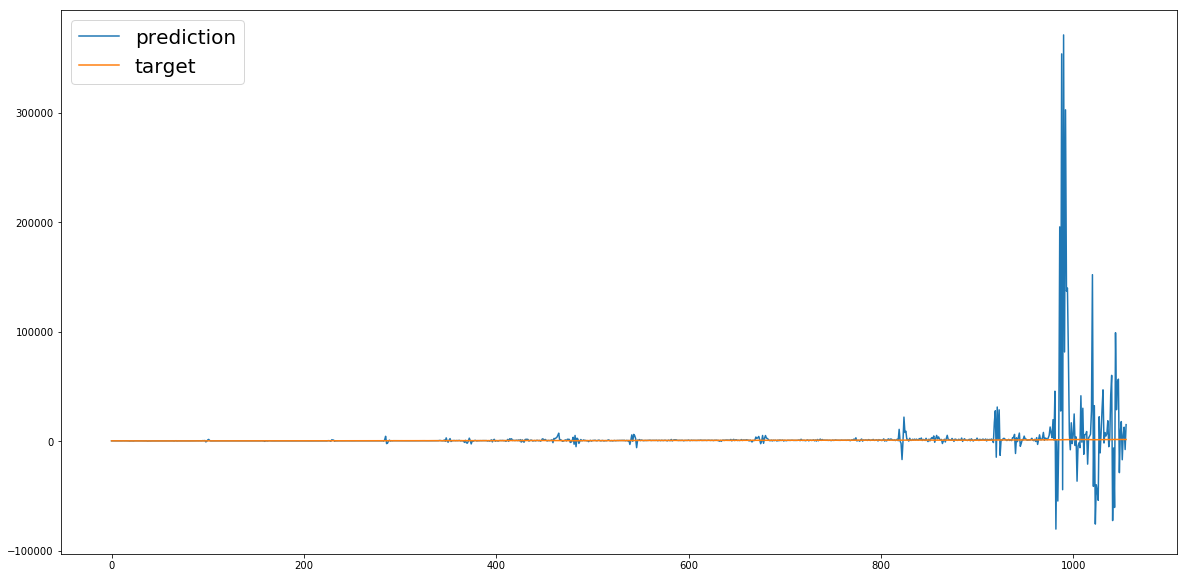

In [59]:
from matplotlib import pyplot as plt

plt.figure(figsize=(20,10))
plt.plot(best_pred, label='prediction')
plt.plot(y_test, label='target')
plt.legend(loc='best', fontsize=20)
plt.show()

## Problem3. Classification Model : Sentiment Analysis (NLP)
- Use amazon_cells_labelled.tsv data to solve your problem3

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Problem 3-1 Load Data
- Load amazon_cells_labelled.tsv and make pandas dataframe.

In [7]:
amazon_review = pd.read_csv('amazon_cells_labelled.tsv')#TODO

amazon_review.loc[133, 'Review\tSentiment'] #1000 *1

'!I definitly recommend!!\t1'

### Problem 3-2 BOW (Bag Of Word)
- Finish your make_review_bow function.
- Make BOW using make_review_bow function.
- Make BOW_df using BOW you made.
    
*hint: Refer to Tutorial code below*

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

In [9]:
#BOW Tutorial

example_doc = [
    'This is the first sentence.',
    'Creating BOW step by step.',
    'This is the last sentence.'
]

print ('# Original text is \n', '\n'.join(example_doc))

vectorizer = CountVectorizer(min_df=0)

vectorizer.fit(example_doc)
x = vectorizer.transform(example_doc)
print ('# Word Vector\n', x)

bow = x.toarray()

bow_df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
bow_df

# Original text is 
 This is the first sentence.
Creating BOW step by step.
This is the last sentence.
# Word Vector
   (0, 3)	1
  (0, 4)	1
  (0, 6)	1
  (0, 8)	1
  (0, 9)	1
  (1, 0)	1
  (1, 1)	1
  (1, 2)	1
  (1, 7)	2
  (2, 4)	1
  (2, 5)	1
  (2, 6)	1
  (2, 8)	1
  (2, 9)	1


,bow,by,creating,first,is,last,sentence,step,the,this
0,0,0,0,1,1,0,1,0,1,1
1,1,1,1,0,0,0,0,2,0,0
2,0,0,0,0,1,1,1,0,1,1


In [10]:
"""
@Function
make_review_bow

@Inputs
__
data : data frame
    Amajon review data frame

@Returns
___
vectorizer 
    :<class 'sklearn.feature_extraction.text.CountVectorizer'> 
    
bow 
    : <class 'scipy.sparse.csr.csr_matrix'>
"""

def make_review_bow(data):    
    vectorizer = CountVectorizer(min_df=0)
    
    ###YOUR CODE HERE###
    column = data.columns[0]
    
    data = list(data.loc[:, column])
    
    vectorizer.fit(data)
    x = vectorizer.transform(data)
    
    bow = x.toarray()

    return vectorizer, bow

In [11]:
vectorizer, bow = make_review_bow(amazon_review)
bow_df = pd.DataFrame(bow, columns=vectorizer.get_feature_names())
bow_df

,10,100,11,12,13,15,15g,18,20,2000,...,wrongly,year,years,yell,yes,yet,you,your,z500a,zero
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,2,0,0,0
8,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Problem 3-3 Split Data : Train / Test
- Split your data (1000 reviews) __Train: 800 / Test: 200__ randomly. 
    - X: bow_df of Review / Y: Sentiment[(int type) 1:pos, 0:neg] 
    - __Make sure your X data match to Y data in random shuffling.__

*hint: Implementing it yourself can be a good experience, but using scikit-learn would make it easy to solve this problem.*

In [12]:
###YOUR CODE HERE###
indexes = amazon_review.index
columns = amazon_review.columns

pro_amazon_review = {'review' : [], 'sentiment' : []}

for index in indexes :
    for column in columns :
        review = amazon_review.loc[index, column][:-2]
        sentiment = amazon_review.loc[index, column][-1:]

        pro_amazon_review['review'].append(review)
        pro_amazon_review['sentiment'].append(sentiment)

data = pd.DataFrame(pro_amazon_review)

import random
shuffle = [x for x in range(1000)]
random.shuffle(shuffle)

data = pd.DataFrame(data, index = shuffle)
data = data.reset_index(drop=True)

x_data = data.loc[:, 'review'].to_frame()
y_data = data.loc[:, 'sentiment'].to_frame()

x_vectorizer, x_data = make_review_bow(x_data)
x_data = pd.DataFrame(x_data, columns=x_vectorizer.get_feature_names())

x_train = x_data.loc[:799, :]
y_train = y_data.loc[:799, :]

x_test = x_data.loc[800:999, :]
y_test = y_data.loc[800:999, :]

x_test

,10,100,11,12,13,15,15g,18,20,2000,...,wrongly,year,years,yell,yes,yet,you,your,z500a,zero
800,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
801,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
802,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
803,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
804,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
805,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
806,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
807,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
808,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
809,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Problem 3-4 Model by SGDClassifier
- Use SGDClassifer to make you classficiation model.
- Train your model using train data and report test score using test data.

*hint: Refer to http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html*

In [13]:
from sklearn.linear_model import SGDClassifier
from

In [14]:
###YOUR CODE HERE###
clf = SGDClassifier()

clf.fit(x_train, y_train)

C:\Users\syle6\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\syle6\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=None, n_iter=None,
       n_jobs=1, penalty='l2', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)

In [15]:
sgdScore = clf.score(x_test, y_test)
print ("Model Accuracy: %f" % sgdScore)

Model Accuracy: 0.800000


### Problem 3-5 Model by Multinomial Naive Bayes
- Use MultinomialNB to make you classficiation model.
- Train your model using train data and report test score using test data.

*hint: Refer to http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html *

In [16]:
from sklearn.naive_bayes import MultinomialNB

In [17]:
###YOUR CODE HERE###
clf = MultinomialNB()

clf.fit(x_train, y_train)

C:\Users\syle6\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [18]:
nbScore = clf.score(x_test, y_test)
print ("Model Accuracy: %f" % nbScore)

Model Accuracy: 0.790000


### Problem 3-6 Select the Best Model with 5 fold Cross Validation
- Split your data (1000 reviews) __Train: 600 / Validation: 200 / Test: 200__ randomly. 
    - X: bow_df of Review / Y: Sentiment[(int type) 1:pos, 0:neg] 
    - __Make sure your X data match to Y data in random shuffling.__
- Choose model you want to use(SGD or NB or both) and give us reason why you choose it.
- Train your model with different parameters using train data and check your model performance by cross validataion score.
- Choose your best model using cross validataion sets and report your test score.

In [19]:
#Split Data
###YOUR CODE HERE###
shuffle = [x for x in range(1000)]
random.shuffle(shuffle)

data = pd.DataFrame(data, index = shuffle)
data = data.reset_index(drop=True)

x_data = data.loc[:, 'review'].to_frame()
y_data = data.loc[:, 'sentiment'].to_frame()

x_vectorizer, x_data = make_review_bow(x_data)
x_data = pd.DataFrame(x_data, columns=x_vectorizer.get_feature_names())



### YOUR ANSWER HERE [reason why you choose that model] ###


NB 모델 선택!
2개의 모델을 비교하여 더 좋은 성능이 나온 모델을 경험적으로 채택하였다.

In [22]:
###YOUR CODE HERE###
from sklearn.model_selection import cross_validate
# have to update sklearn


clf =  MultinomialNB()
cros_valid = cross_validate(clf, x_train, y_train, return_train_score=False, cv=4)

clf.fit(x_train, y_train)

test_score = clf.score(x_test, y_test)

print(cros_valid['test_score'].mean(), test_score)

0.788747249931 0.79


C:\Users\syle6\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\syle6\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\syle6\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\syle6\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), 

In [26]:
clf = SGDClassifier()
cross_valid = cross_validate(clf, x_train, y_train, return_train_score=False, cv=4)

clf.fit(x_train, y_train)

test_score = clf.score(x_test, y_test)

print(cross_valid['test_score'].mean(), test_score)

0.778772375559 0.79


C:\Users\syle6\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)
C:\Users\syle6\Anaconda3\lib\site-packages\sklearn\utils\validation.py:578: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\syle6\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDClassifier'> in 0.19. If both are left unset,

## Problem4. Clustering Model
- In this problem, you will cluster news article documents after converting them to TF-IDF vectors.
- All results may be different from the example results depending on your choice.

In [27]:
import pandas as pd
import numpy as np
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import cosine_similarity
import matplotlib.pyplot as plt
from sklearn.manifold import MDS

### Problem 4-1 Pick 3 Categories you want and download

In [28]:
"""

['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']
 
"""
categories = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc']

In [29]:
dataset = fetch_20newsgroups(subset='test', categories=categories,
                             shuffle=True, random_state=45)
print("%s" % dataset.description)
print("%d documents" % len(dataset.data))
print("%d categories" % len(dataset.target_names))

the 20 newsgroups by date dataset
1102 documents
3 categories


### Problem 4-2 Convert the documents to a tf-idf matrix 
- refer to http://mlwiki.org/index.php/TF-IDF
- You can use sklearn.
- Set your own hyperparams.

In [30]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(dataset.data)
tfidf_matrix

<1102x35454 sparse matrix of type '<class 'numpy.float64'>'
	with 177441 stored elements in Compressed Sparse Row format>

### Problem 4-3 Cluster the documents using K-means
- You can use sklearn
- Set your own hyperparams

In [31]:
num_clusters = 3
km = KMeans(n_clusters=num_clusters, random_state=1).fit(tfidf_matrix)
#TODO
clusters = km.labels_.tolist()
print(clusters[:10])

[1, 2, 1, 0, 1, 2, 0, 1, 2, 1]


### Problem 4-4 Visualize document clusters
- You can use sklearn
- It may take a long time to compile

In [32]:
#USE THIS -DO NOT CHANGE-
dist = 1 - cosine_similarity(tfidf_matrix)
MDS()
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)
pos = mds.fit_transform(dist)
xs, ys = pos[:, 0], pos[:, 1]

cluster_colors = {0: '#1b9e77', 1: '#d95f02', 2: '#7570b3'}
cluster_names = categories

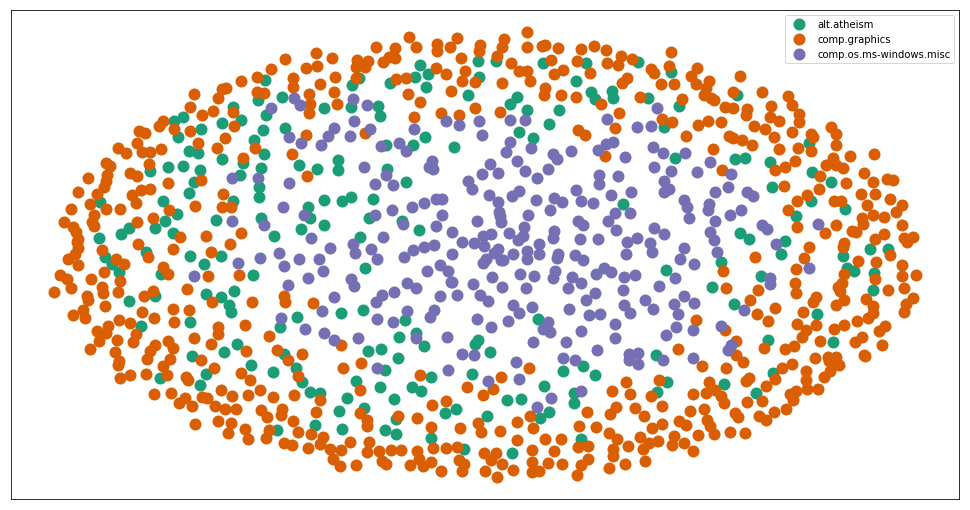

In [33]:
def visualize_clusters(xs, ys, clusters, cluster_names, cluster_colors):
    %matplotlib inline 
    df = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 
    groups = df.groupby('label')
    ##TODO
    fig, ax = plt.subplots(figsize=(17, 9))
    ax.margins(0.05) 
    for name, group in groups:
        ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, 
                label= cluster_names[name],
                color= cluster_colors[name],
                mec='none')
        ax.set_aspect('auto')
        ax.tick_params(\
            axis= 'x',          
            which='both',      
            bottom='off',      
            top='off',         
            labelbottom='off')
        ax.tick_params(\
            axis= 'y',         
            which='both',     
            left='off',     
            top='off',      
            labelleft='off')
    ax.legend(numpoints=1) 
    plt.show() 

visualize_clusters(xs, ys, clusters, cluster_names, cluster_colors)